In [2]:

from pathlib import Path
import os

import pygwalker as pyg
import dabl

from src.logger import Logger
from src.preprocessing import DataPrep
from src.eda import EDA
from src.feature import FeatureEngineer, FeatureAdditional, XAI
from src.clustering import Clustering, ClusteringAnalysis
from src.train import Model
from src.visualization import Visualizer
from src.utils import setup_matplotlib_korean

logger_instance = Logger()
# logger= setup_matplotlib_korean(logger_instance.logger)
base_path =Path(r'D:\dev\upstageailab5-ml-regression-ml_r4')
# setup_matplotlib_korean(logger)
#Path('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')
out_path = os.path.join(base_path,'output')
config ={   
    'out_path':out_path,
    'base_path':base_path,
         'logger': logger_instance.logger,
         'random_seed': 2024,
         'target': 'target',
         'thr_ratio_outlier': 0.01,
         'thr_ratio_null': 0.9,
         'wandb': {
            'project': 'project-regression_house_price',     # 필수: wandb 프로젝트명
            'entity': 'joon',          # 필수: wandb 사용자/조직명
           # 'name': 'run-name',            # 선택: 실험 실행 이름 (지정하지 않으면 자동 생성)
            'group': 'group-ml4',    # 선택: 실험 그룹명
            #'tags': ['tag1', 'tag2'],      # 선택: 실험 태그
            #'notes': 'experiment notes'     # 선택: 실험 노트
    }}


2024-11-07 18:50:43,823 - root - INFO - Initialized Logger.


In [6]:
data_prep = DataPrep(config)
df_raw = data_prep._load_data_concat_train_test()

eda = EDA(config)
eda._analyze_basic_info(df_raw)


2024-11-07 18:55:52,897 - root - INFO - #### Init Data Prep.. 
2024-11-07 18:55:59,782 - root - INFO - 데이터 로드 완료: (1128094, 52)
2024-11-07 18:55:59,800 - root - INFO - Train data shape : (1118822, 52), Test data shape : (9272, 51)
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201712    8  3  1987   

   ...    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일 사용허가여부  \
0  ...  4858.0  262.0                  임의  2022-11-17 13:00:29.0      Y   

  관리비 업로드        좌표X        좌표Y                  단지신청일  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000  

[1 rows x 52 columns]
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  202307   26  5  1987   

   ... 청소비관리형태    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일  \
0  ...      직영  4858.0  262.0                  임의  2022-11-17 13:00:29.0   

<class 'pandas.core.frame.DataFrame'>
Index: 1128094 entries, 0 to 9271
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적                    1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  해제사유발생일                 6195 non-null     float64
 12  등기신청일자                  1128094 non-null  object 
 13  거래유형                    1128094 non-null  object 
 14  중개사소재지    

2024-11-07 18:56:04,080 - root - INFO - 
Basic Statistics:
                 본번            부번          전용면적          계약년월           계약일  \
count  1.128019e+06  1.128019e+06  1.128094e+06  1.128094e+06  1.128094e+06   
mean   5.653234e+02  5.976400e+00  7.716028e+01  2.014829e+05  1.579966e+01   
std    5.167611e+02  4.674920e+01  2.936448e+01  4.237691e+02  8.722162e+00   
min    0.000000e+00  0.000000e+00  1.002000e+01  2.007010e+05  1.000000e+00   
25%    1.770000e+02  0.000000e+00  5.965000e+01  2.011110e+05  8.000000e+00   
50%    4.710000e+02  0.000000e+00  8.187000e+01  2.015080e+05  1.600000e+01   
75%    7.810000e+02  1.000000e+00  8.496000e+01  2.018050e+05  2.300000e+01   
max    4.974000e+03  2.837000e+03  4.243200e+02  2.023090e+05  3.100000e+01   

                  층          건축년도       해제사유발생일    단지소개기존clob         k-전체동수  \
count  1.128094e+06  1.128094e+06  6.195000e+03  69136.000000  250887.000000   
mean   8.881412e+00  1.998791e+03  2.021126e+07    541.272911      14

In [5]:
walker = pyg.walk(
    df_raw,
    spec="./chart_meta_0.json",    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    kernel_computation=True,          # set `kernel_computation=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006264fa0b92c18eWLRxPO2DBC9Xndr" style="height: auto">\n    <hea…

2024-11-07 18:51:27,640 - root - INFO - #### Init Data Prep.. 
2024-11-07 18:51:27,641 - root - INFO - #### Data Prep starts...
2024-11-07 18:51:34,760 - root - INFO - 데이터 로드 완료: (1128094, 52)
2024-11-07 18:51:34,780 - root - INFO - Train data shape : (1118822, 52), Test data shape : (9272, 51)
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201712    8  3  1987   

   ...    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일 사용허가여부  \
0  ...  4858.0  262.0                  임의  2022-11-17 13:00:29.0      Y   

  관리비 업로드        좌표X        좌표Y                  단지신청일  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000  

[1 rows x 52 columns]
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  202307   26  5  1987   

   ... 청소비관리형태    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일  \
0  ...    

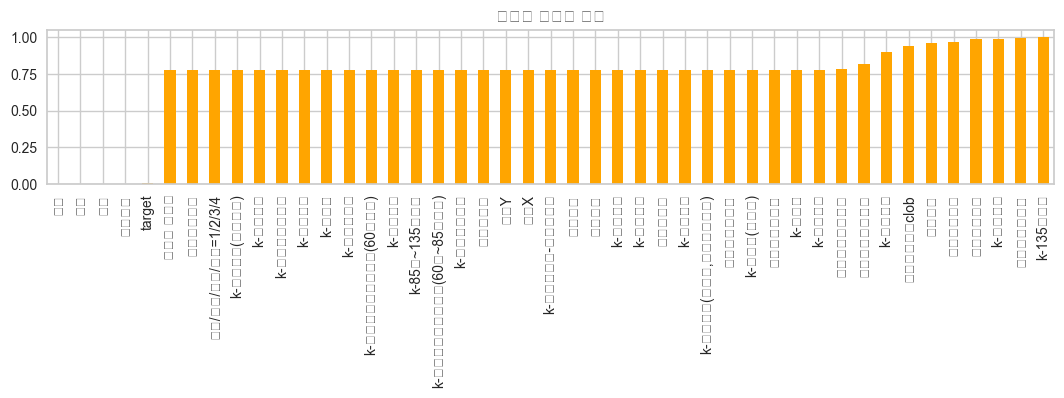

2024-11-07 18:51:50,459 - root - INFO - * 결측치 비율이 90.0% 이하인 변수들: ['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'is_test']
2024-11-07 18:51:50,460 - root - INFO - * 결측치 비율이 90.0% 초과인 변수들: ['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', 'k-135㎡초과', 'k-등록일자']
2024-11-07 18:51:50,858 - root - INFO - ### Null Check.. 
2024-11-07 18:51:50,859 - root - INFO - 결측치 확인
2024-11-07 18:51:51,667 - root - INFO - 시군구                             0
번지                            227
본번                             75
부번                             75
아파트명      

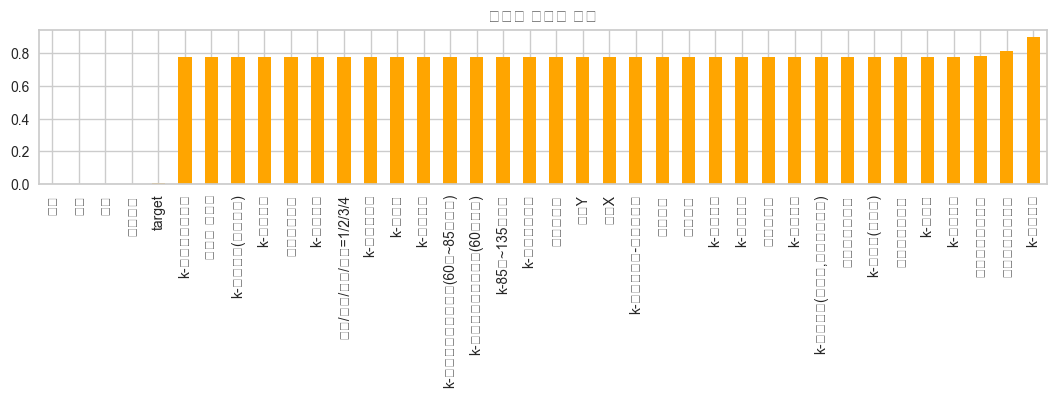

2024-11-07 18:51:53,815 - root - INFO - #### Interpolation starts...
연속형 변수는 선형보간을 해주고, 범주형변수는 알수없기에 “unknown”이라고 임의로 보간해 주겠습니다.
2024-11-07 18:51:53,816 - root - INFO - 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
2024-11-07 18:51:54,667 - root - INFO - 연속형 변수: ['전용면적', '계약년월', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'is_test']
2024-11-07 18:51:54,668 - root - INFO - 범주형 변수: ['시군구', '번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']
2024-11-07 18:51:58,326 - root - INFO - 결측치가 보간된 모습을 확인해봅니다.
2024-11-07 18:51:59,248 - root - INFO - 시군구                       0
번지                  

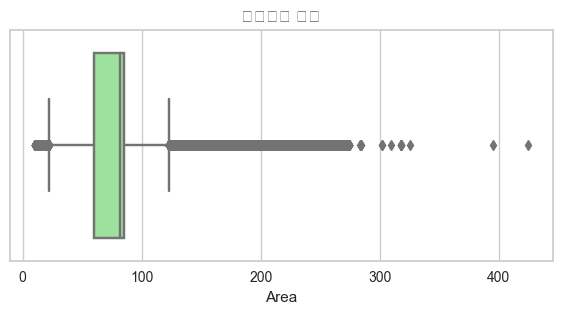

2024-11-07 18:52:11,748 - root - INFO - 
=== Data Preparation Comparison ===
2024-11-07 18:52:11,750 - root - INFO - 
Before vs After Statistics:
2024-11-07 18:52:11,771 - root - INFO - 
                         Before                                           \
                           type missing_count missing_ratio unique_count   
시군구                      object             0      0.000000          339   
번지                       object           227      0.020122         6578   
본번                      float64            75      0.006648         1523   
부번                      float64            75      0.006648          329   
아파트명                     object          2136      0.189346         6549   
전용면적                    float64             0      0.000000        14670   
계약년월                      int64             0      0.000000          201   
계약일                       int64             0      0.000000           31   
층                         int64             0      0.

Box(children=(HTML(value='\n<div id="ifr-pyg-0006264f96a41fb7daMCY0ZvXOlqQHeu" style="height: auto">\n    <hea…

<Figure size 800x550 with 0 Axes>

In [3]:
df = data_prep.data_prep()



In [3]:

eda = EDA(config)
feat_eng = FeatureEngineer(config)
clustering = Clustering(config)
clustering_analysis = ClusteringAnalysis(config)
model = Model(config)
visualizer = Visualizer(config)

2024-11-07 18:43:45,625 - root - INFO - #### Init Data Prep.. 
2024-11-07 18:43:45,626 - root - INFO - #### Init Feature Engineering... 
2024-11-07 18:43:45,627 - root - INFO - ## Visualizer 클래스 초기화


#### Init Model Train... 


2024-11-07 18:43:52,896 - root - INFO - #### Data Prep starts...
2024-11-07 18:43:59,959 - root - INFO - 데이터 로드 완료: (1128094, 52)
2024-11-07 18:43:59,973 - root - INFO - Train data shape : (1118822, 52), Test data shape : (9272, 51)
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201712    8  3  1987   

   ...    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일 사용허가여부  \
0  ...  4858.0  262.0                  임의  2022-11-17 13:00:29.0      Y   

  관리비 업로드        좌표X        좌표Y                  단지신청일  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000  

[1 rows x 52 columns]
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  202307   26  5  1987   

   ... 청소비관리형태    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일  \
0  ...      직영  4858.0  262.0                  임의  2022-11-17 13:00:29.0 

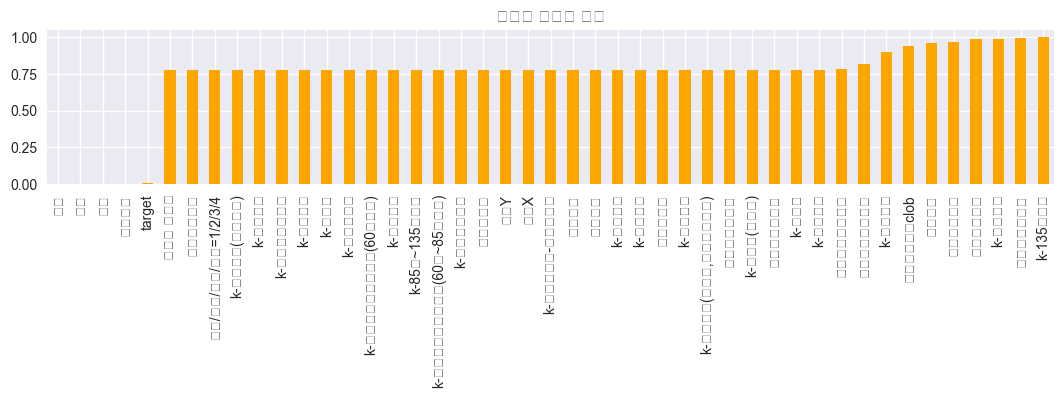

2024-11-07 18:44:14,749 - root - INFO - * 결측치 비율이 90.0% 이하인 변수들: ['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'is_test']
2024-11-07 18:44:14,750 - root - INFO - * 결측치 비율이 90.0% 초과인 변수들: ['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', 'k-135㎡초과', 'k-등록일자']
2024-11-07 18:44:15,134 - root - INFO - ### Null Check.. 
2024-11-07 18:44:15,135 - root - INFO - 결측치 확인
2024-11-07 18:44:15,971 - root - INFO - 시군구                             0
번지                            227
본번                             75
부번                             75
아파트명      

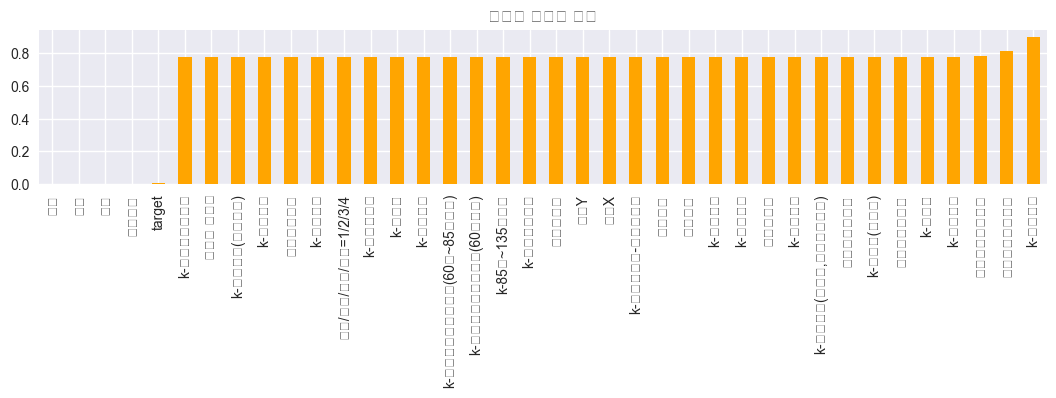

2024-11-07 18:44:17,825 - root - INFO - #### Interpolation starts...
연속형 변수는 선형보간을 해주고, 범주형변수는 알수없기에 “unknown”이라고 임의로 보간해 주겠습니다.
2024-11-07 18:44:17,826 - root - INFO - 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
2024-11-07 18:44:18,734 - root - INFO - 연속형 변수: ['전용면적', '계약년월', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'is_test']
2024-11-07 18:44:18,737 - root - INFO - 범주형 변수: ['시군구', '번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']
2024-11-07 18:44:22,446 - root - INFO - 결측치가 보간된 모습을 확인해봅니다.
2024-11-07 18:44:23,453 - root - INFO - 시군구                       0
번지                  

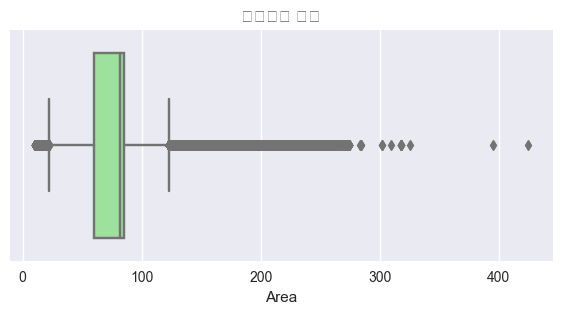

2024-11-07 18:44:35,359 - root - INFO - 
=== Data Preparation Comparison ===
2024-11-07 18:44:35,360 - root - INFO - 
Before vs After Statistics:
2024-11-07 18:44:35,397 - root - INFO - 
                         Before                                           \
                           type missing_count missing_ratio unique_count   
시군구                      object             0      0.000000          339   
번지                       object           227      0.020122         6578   
본번                      float64            75      0.006648         1523   
부번                      float64            75      0.006648          329   
아파트명                     object          2136      0.189346         6549   
전용면적                    float64             0      0.000000        14670   
계약년월                      int64             0      0.000000          201   
계약일                       int64             0      0.000000           31   
층                         int64             0      0.

<Figure size 1000x600 with 0 Axes>

In [4]:


df_raw = data_prep._load_data_concat_train_test()

2024-11-07 18:28:25,541 - root - INFO - 
=== 기본 데이터 정보 ===
2024-11-07 18:28:26,560 - root - INFO - 
DataFrame Info:
None


<class 'pandas.core.frame.DataFrame'>
Index: 1128094 entries, 0 to 9271
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적                    1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  해제사유발생일                 6195 non-null     float64
 12  등기신청일자                  1128094 non-null  object 
 13  거래유형                    1128094 non-null  object 
 14  중개사소재지    

2024-11-07 18:28:28,109 - root - INFO - 
Basic Statistics:
                 본번            부번          전용면적          계약년월           계약일  \
count  1.128019e+06  1.128019e+06  1.128094e+06  1.128094e+06  1.128094e+06   
mean   5.653234e+02  5.976400e+00  7.716028e+01  2.014829e+05  1.579966e+01   
std    5.167611e+02  4.674920e+01  2.936448e+01  4.237691e+02  8.722162e+00   
min    0.000000e+00  0.000000e+00  1.002000e+01  2.007010e+05  1.000000e+00   
25%    1.770000e+02  0.000000e+00  5.965000e+01  2.011110e+05  8.000000e+00   
50%    4.710000e+02  0.000000e+00  8.187000e+01  2.015080e+05  1.600000e+01   
75%    7.810000e+02  1.000000e+00  8.496000e+01  2.018050e+05  2.300000e+01   
max    4.974000e+03  2.837000e+03  4.243200e+02  2.023090e+05  3.100000e+01   

                  층          건축년도       해제사유발생일    단지소개기존clob         k-전체동수  \
count  1.128094e+06  1.128094e+06  6.195000e+03  69136.000000  250887.000000   
mean   8.881412e+00  1.998791e+03  2.021126e+07    541.272911      14

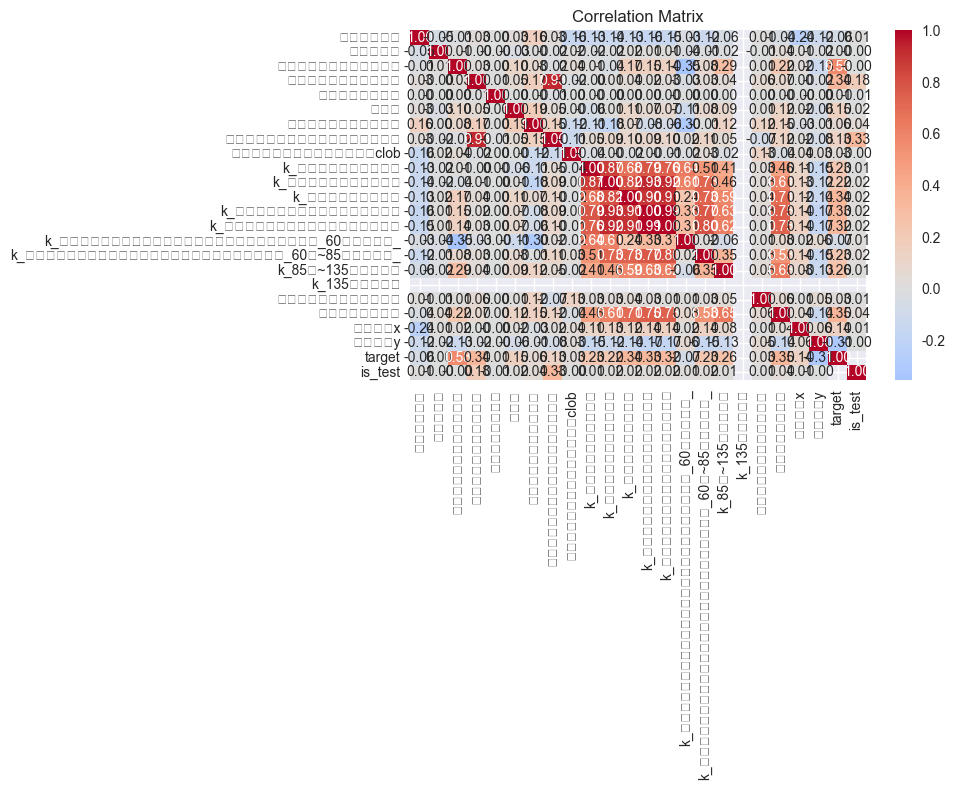

2024-11-07 18:28:39,387 - root - INFO - 
=== 범주형 변수 분석 ===
2024-11-07 18:28:39,460 - root - INFO - 
시군구 Value Counts:
시군구
서울특별시 노원구 상계동    45232
서울특별시 노원구 중계동    26524
서울특별시 양천구 신정동    23768
서울특별시 도봉구 창동     23222
서울특별시 구로구 구로동    22941
                 ...  
서울특별시 중구 필동1가        6
서울특별시 용산구 주성동        5
서울특별시 종로구 연지동        4
서울특별시 중구 입정동         3
서울특별시 마포구 구수동        3
Name: count, Length: 339, dtype: int64


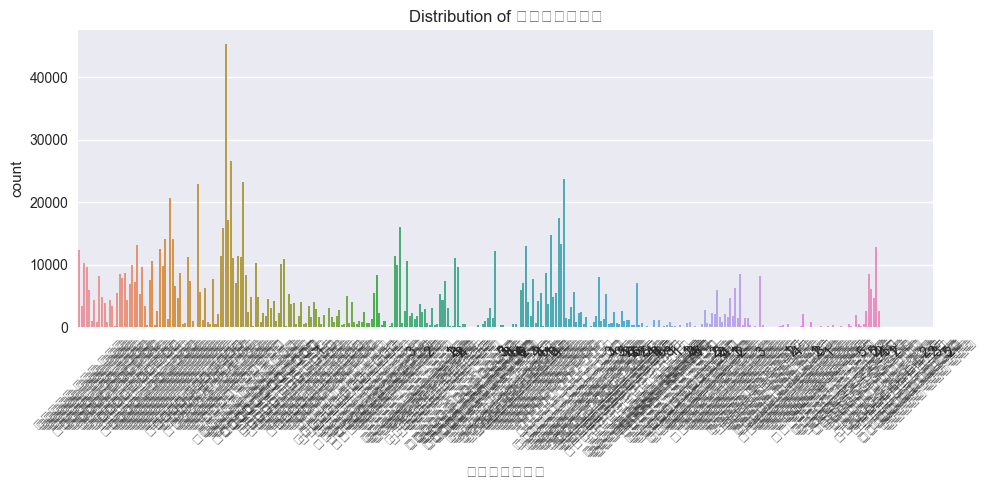

2024-11-07 18:28:43,613 - root - INFO - 
번지 Value Counts:
번지
13         4670
17         4600
10         4577
347        4291
481        4191
           ... 
792-20        1
752-42        1
8-27          1
90-13         1
1553-15       1
Name: count, Length: 6578, dtype: int64


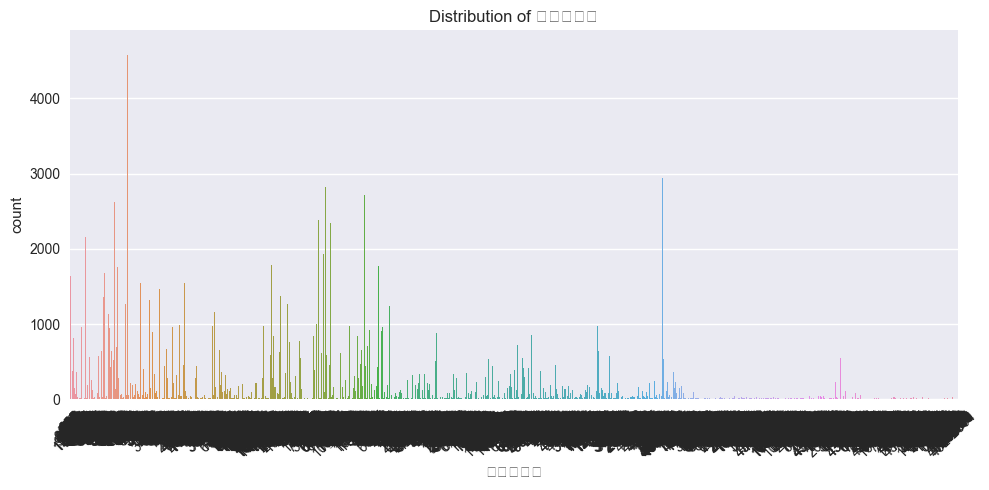

2024-11-07 18:29:49,091 - root - INFO - 
아파트명 Value Counts:
아파트명
현대               16779
신동아              12929
한신                9128
두산                8593
주공2               7955
                 ...  
DMC금호리첸시아            1
은진스톤하우스21차           1
제니스뷰                 1
DK밸리뷰서초2차            1
힐스테이트세운센트럴1단지        1
Name: count, Length: 6549, dtype: int64


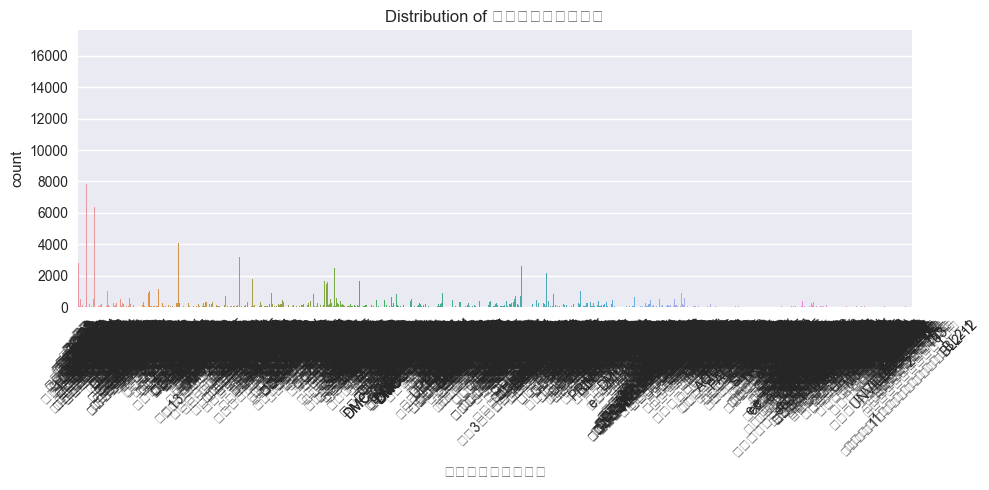

2024-11-07 18:31:13,367 - root - INFO - 
도로명 Value Counts:
도로명
올림픽로 435      4372
솔샘로 174       4049
송파대로 345      3668
성북로4길 52      3519
양재대로 1340     3369
              ... 
한강대로62길 18       1
광나루로39길 11       1
 20-3            1
곰달래로 60-1        1
을지로15길 31        1
Name: count, Length: 9245, dtype: int64


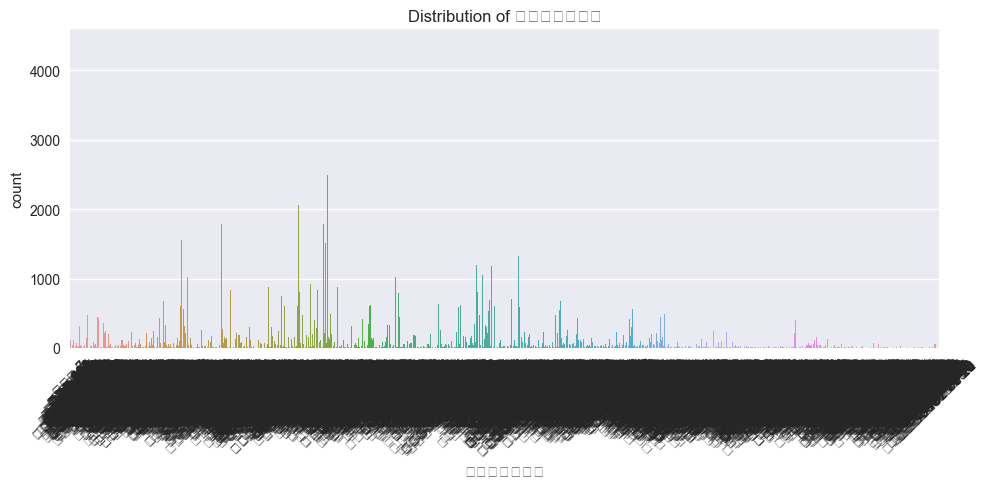

2024-11-07 18:33:31,103 - root - INFO - 
등기신청일자 Value Counts:
등기신청일자
            1111265
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: count, Length: 182, dtype: int64


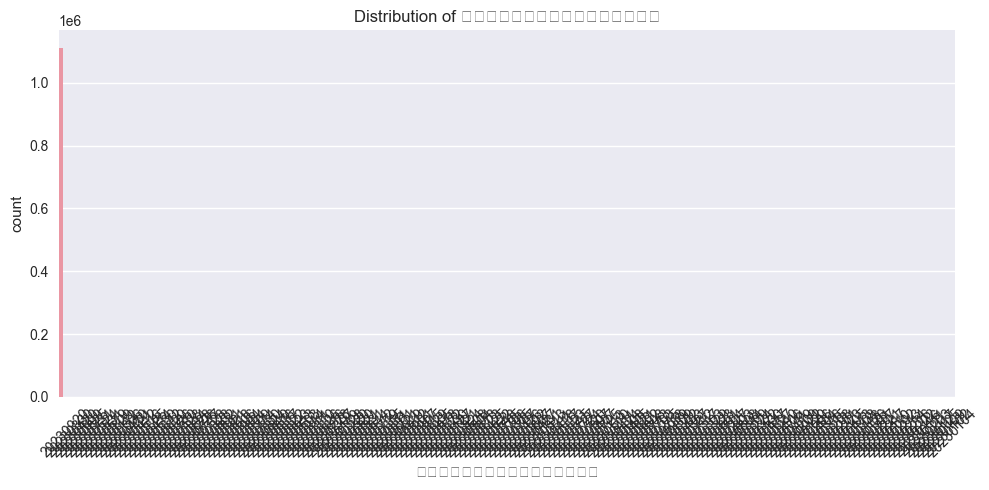

2024-11-07 18:33:33,529 - root - INFO - 
거래유형 Value Counts:
거래유형
-       1086451
중개거래      38117
직거래        3496
Name: count, dtype: int64


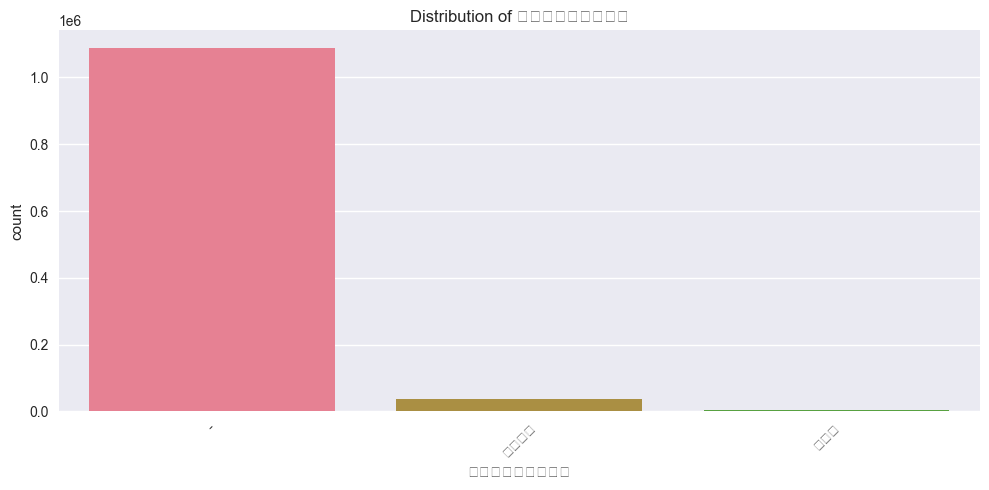

2024-11-07 18:33:34,347 - root - INFO - 
중개사소재지 Value Counts:
중개사소재지
-                    1089989
서울 노원구                  2626
서울 송파구                  2539
서울 강남구                  2508
서울 강동구                  2038
                      ...   
서울 강북구, 서울 양천구             1
경기 남양주시, 경기 성남수정구          1
서울 송파구, 인천 계양구             1
경기 연천군, 서울 송파구             1
서울 중랑구, 인천 부평구             1
Name: count, Length: 739, dtype: int64


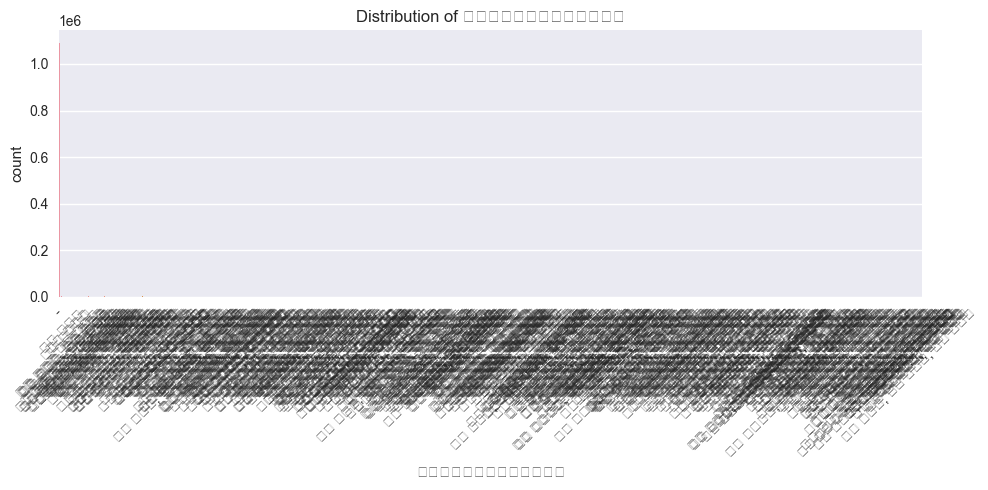

2024-11-07 18:33:42,880 - root - INFO - 
k_단지분류_아파트_주상복합등등_ Value Counts:
k_단지분류_아파트_주상복합등등_
아파트               238584
주상복합               11450
도시형 생활주택(주상복합)       505
도시형 생활주택(아파트)        155
연립주택                 125
Name: count, dtype: int64


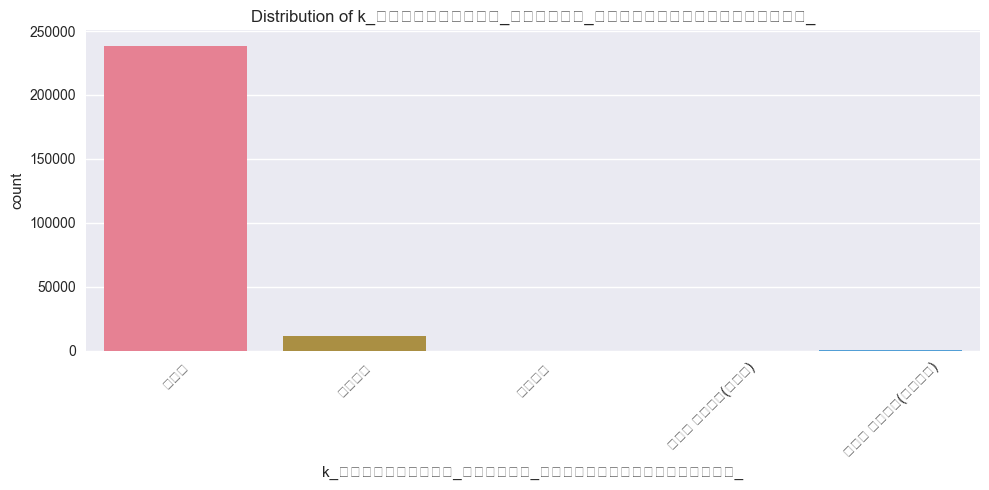

2024-11-07 18:33:43,580 - root - INFO - 
k_전화번호 Value Counts:
k_전화번호
024162883      3068
02-575-5024    2816
024046006      2605
025677608      2515
023743863      2385
               ... 
226662806.0       1
29748290.0        1
25147022.0        1
024524500         1
0222099040        1
Name: count, Length: 1082, dtype: int64


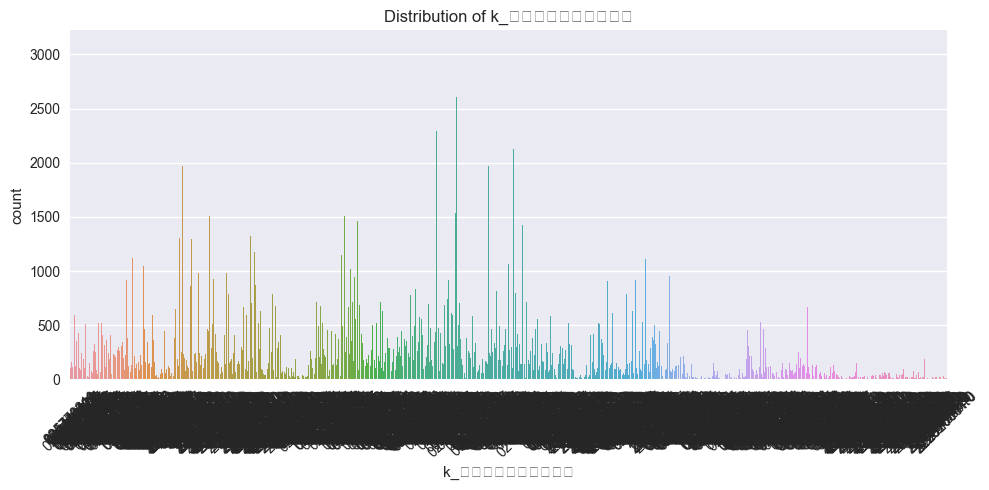

2024-11-07 18:33:54,501 - root - INFO - 
k_팩스번호 Value Counts:
k_팩스번호
02-572-3212    2816
24162280.0     2470
025613140      2425
29797224.0     2378
25334075.0     2321
               ... 
220689972.0       1
0222099041        1
028130449         1
024524533         1
025861159         1
Name: count, Length: 1385, dtype: int64


KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>

In [4]:
df_auto = eda.automated_eda(df_raw)

In [ ]:

feat_eng.feature_engineering(df)


data_prep.
model.model_train(X_train, X_val, y_train, y_val, 'k_fold')
config['X_train'] = X_train
config['X_test'] = X_test
config['model'] = model
xai = XAI(config)

# .head() / .tail(): DataFrame의 앞부분이나 뒷부분을 확인합니다.
# .info(): 열 정보와 데이터 타입, 결측치 유무 등을 확인합니다.
# .describe(): 수치형 데이터에 대한 요약 통계를 출력합니다

In [ ]:

# EDA Auto
eda.automated_eda(df)

#### Init Data Prep.. 
#### Init Feature Engineering... 
#### Init Model Train... 
Train data shape :  (1118822, 52) Test data shape :  (9272, 51)
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  201712    8  3  1987   

   ...    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일 사용허가여부  \
0  ...  4858.0  262.0                  임의  2022-11-17 13:00:29.0      Y   

  관리비 업로드        좌표X        좌표Y                  단지신청일  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000  

[1 rows x 52 columns]
             시군구     번지     본번   부번    아파트명  전용면적(㎡)    계약년월  계약일  층  건축년도  \
0  서울특별시 강남구 개포동  658-1  658.0  1.0  개포6차우성    79.97  202307   26  5  1987   

   ... 청소비관리형태    건축면적   주차대수 기타/의무/임대/임의=1/2/3/4                  단지승인일  \
0  ...      직영  4858.0  262.0                  임의  2022-11-17 13:00:29.0   

  사용허가여부 관리비 업로드        좌표X        좌표Y                  단지신청일  
0      Y       N  

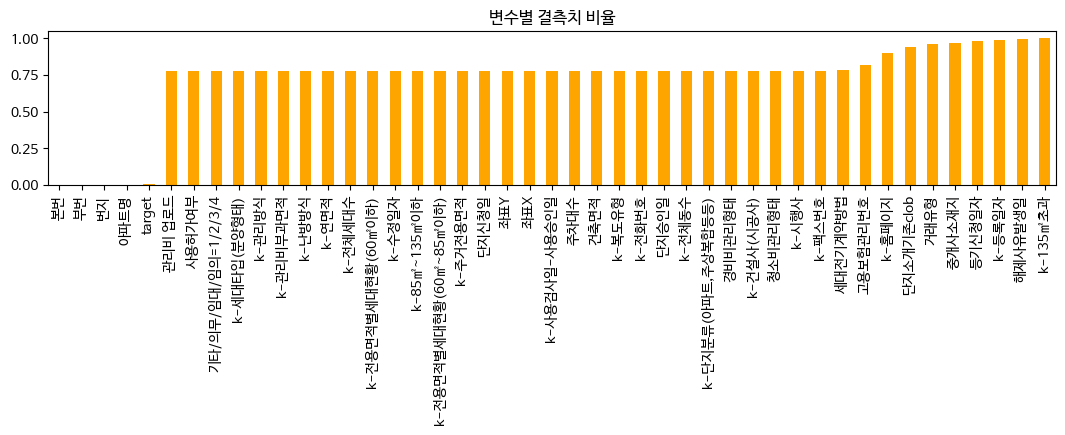

* 결측치가 100만개 이하인 변수들 : ['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'is_test']
* 결측치가 100만개 이상인 변수들 : ['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 45 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null

0    1029574
1       9272
Name: is_test, dtype: int64

In [2]:


feat_eng = FeatureEngineer(config)
model_instance = Model(config)
df = data_prep.load_data(base_path)
df = data_prep.prep_null(df)
df = data_prep.prep_inter(df)
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
cols = ['계약년', '전용면적', '강남여부', '구', '건축년도', '좌표X', '좌표Y', '동']
df = data_prep.remove_outliers_iqr(df, '전용면적')
# 이상치 제거 후의 shape은 아래와 같습니다. 약 10만개의 데이터가 제거된 모습을 확인할 수 있습니다.
print(df.shape)
df['is_test'].value_counts()     # 또한, train data만 제거되었습니다.


In [ ]:
# 클러스터링 분석 객체 생성
clustering = ClusteringAnalysis(config)

# 최적 파라미터 찾기
features = ['feature1', 'feature2', 'feature3']  # 클러스터링에 사용할 특성들
optimal_eps, optimal_min_samples = clustering.find_optimal_dbscan_params(
    df=your_dataframe,
    features=features,
    min_samples_range=range(2, 10),
    n_neighbors=5
)

In [ ]:

#### Feat eng
df = feat_eng.prep_feat(df)

df_coor = {'x': '좌표X', 'y': '좌표Y'}
df_subway = data_prep.load_feat_data(os.path.join(base_path, 'data','subway_feature.csv'))
df_bus = data_prep.load_feat_data(os.path.join(base_path, 'data','bus_feature.csv'))

subway_coor = {'x': '위도', 'y': '경도'}
bus_coor = {'x': 'X좌표', 'y': 'Y좌표'}


Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target',
       'is_test', '구', '동', '계약년', '계약월'],
      dtype='object')
Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수'

In [4]:

df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_subway, subway_coor, 'subway')
df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_bus, bus_coor, 'bus')

  4%|▎         | 37/1039 [00:02<01:21, 12.35it/s]


KeyboardInterrupt: 

In [3]:
import pandas as pd
path_feat = os.path.join(out_path, 'data_feature_bus_subway.csv')
# df.to_csv(path_feat,  index=False)

df = pd.read_csv(path_feat)#, index_col=False)
df.head()


,Unnamed: 0,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,...,target,is_test,구,동,계약년,계약월,강남여부,신축여부,distance_sum_subway,distance_sum_bus
0,0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,...,124000.0,0,강남구,개포동,2017,12,1,0,97229.588688,1696.099718
1,1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,...,123500.0,0,강남구,개포동,2017,12,1,0,97229.588688,1696.099718
2,2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,...,91500.0,0,강남구,개포동,2017,12,1,0,97229.588688,1696.099718
3,3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,...,130000.0,0,강남구,개포동,2018,1,1,0,97229.588688,1696.099718
4,4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,...,117000.0,0,강남구,개포동,2018,1,1,0,97229.588688,1696.099718


In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

### split
dt_train, dt_test, continuous_columns_v2, categorical_columns_v2 = feat_eng.split_train_test(df)


print(dt_train.dtypes)
# dt_train.fillna('missing', inplace=True) 
dt_train, label_encoders = feat_eng.encode_label(dt_train, dt_test, continuous_columns_v2, categorical_columns_v2)

(1029574, 43) (9272, 43)
연속형 변수: ['전용면적', '계약년월', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target']
범주형 변수: ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']
번지                         object
본번                         object
부번                         object
아파트명                       object
전용면적                      float64
계약년월                        int64
계약일                         int64
층                           int64
건축년도                        int64
도로명                        object
k-단지분류(아파트,주상복합등등)         object
k-전화번호                     object
k-팩스번호                     object
k-세대타입(분양형태)               object
k-관리방식 

100%|██████████| 25/25 [00:06<00:00,  4.05it/s]


In [4]:

X_train, X_val, y_train, y_val = feat_eng.split_dataset(dt_train)

prep_data = {'X_train': X_train,
            'X_val': X_val,
            'y_train': y_train,
            'y_val': y_val,
            'continuous_columns': continuous_columns_v2,
            'categorical_columns': categorical_columns_v2
}
out_path_data = model_instance.save_data(prep_data)
# loaded_data = load_data_pkl(out_path_data)
# print(loaded_data)


Dataset Saved to  /data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/output/prep_data.pkl


In [5]:
X_train.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

In [ ]:

model, pred = model_instance.model_train(X_train, X_val, y_train, y_val, 'k_fold')
feat_eng.select_var(model, X_val, y_val, pred, label_encoders, categorical_columns_v2)

In [ ]:
import pickle

# model_name = 'XGB'
# type = 'k_fold'
# out_model_path = os.path.join(out_path, f'saved_model_{model_name}_{type}.pkl')

# with open(out_model_path, 'rb') as f:
#     model = pickle.load(f)

X_test = dt_test.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)
#real_test_pred          # 예측값들이 출력됨을 확인할 수 있습니다.

# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv(os.path.join(out_path,'output.csv'), index=False)

# Inference

In [ ]:

model_instance.inference(dt_test)

In [ ]:
# from pandasai import Aget
# os.environ["PANDASAI_API_KEY"] = os.getenv('pandas_ai_api')

# agent = Agent(df)
# agent.chat('Which are the top 5 countries by sales?')
# pandas_ai.run(df, prompt='Plot the histogram of GDP for each country.')


    # def load_feat_data(self, path):
    #     dt = pd.read_csv(path)
    #     print('Test data shape : ', dt.shape)
    #     # Train과 Test data를 살펴보겠습니다.
    #     print(dt.head(1))
    #     return dt